<a href="https://colab.research.google.com/github/viswanathareddy04/MachineLearning/blob/main/disease_prediction_project_03_05_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [5]:
df1 = pd.read_excel('disease_and_symptoms2_good.xlsx', header=None)

# row_counts = df1.count(axis=1)

# print(max(row_counts))

df1.columns = ['code', 'Disease', 'Symptom_1', 'Severity_1', 'Symptom_2', 'Severity_2',
              'Symptom_3', 'Severity_3', 'Symptom_4', 'Severity_4', 'Symptom_5', 'Severity_5',
              'Symptom_6', 'Severity_6', 'Symptom_7', 'Severity_7', 'Symptom_8', 'Severity_8',
              'Symptom_9', 'Severity_9', 'Symptom_10', 'Severity_10', 'Symptom_11', 'Severity_11', 'Symptom_12', 'Severity_12',
             ]

df1.head()

,code,Disease,Symptom_1,Severity_1,Symptom_2,Severity_2,Symptom_3,Severity_3,Symptom_4,Severity_4,...,Symptom_8,Severity_8,Symptom_9,Severity_9,Symptom_10,Severity_10,Symptom_11,Severity_11,Symptom_12,Severity_12
0,202,Hyperkalemia,"[{symptoms"":""Shortness of breath""}""","{symptoms"":""52""}""","{symptoms"":""Weakness""}""","{symptoms"":""49""}""","{symptoms"":""Nausea""}""","{symptoms"":""45""}""","{symptoms"":""Vomiting""}""","{symptoms"":""40""}""",...,"{symptoms"":""Sharp abdominal pain""}""","{symptoms"":""24""}""","{symptoms"":""Feeling ill""}""","{symptoms"":""15""}""","{symptoms"":""Decreased heart rate""}""","{symptoms"":""12""}""","{symptoms"":""Decreased appetite""}""","{symptoms"":""12""}""","{symptoms"":""Difficulty in swallowing""}""","{symptoms"":""8""}]"""
1,203,Cornea infection,"[{symptoms"":""Pain in eye""}""","{symptoms"":""80""}""","{symptoms"":""Eye redness""}""","{symptoms"":""66""}""","{symptoms"":""Diminished vision""}""","{symptoms"":""55""}""","{symptoms"":""Symptoms of eye""}""","{symptoms"":""44""}""",...,"{symptoms"":""Itchiness of eye""}""","{symptoms"":""21""}""","{symptoms"":""Spots or clouds in vision""}""","{symptoms"":""13""}""","{symptoms"":""Swollen eye""}""","{symptoms"":""10""}""","{symptoms"":""Lip swelling""}""","{symptoms"":""7""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""7""}]"""
2,204,Abscess of the lung,"[{symptoms"":""Cough""}""","{symptoms"":""81""}""","{symptoms"":""Sharp chest pain""}""","{symptoms"":""72""}""","{symptoms"":""Shortness of breath""}""","{symptoms"":""72""}""","{symptoms"":""Hemoptysis""}""","{symptoms"":""54""}""",...,"{symptoms"":""Vomiting""}""","{symptoms"":""54""}""","{symptoms"":""Headache""}""","{symptoms"":""54""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""5""}""","{symptoms"":""Wrist weakness""}""","{symptoms"":""5""}""","{symptoms"":""Excessive growth""}""","{symptoms"":""5""}]"""
3,205,Dengue fever,"[{symptoms"":""Sore throat""}""","{symptoms"":""100""}""","{symptoms"":""Fever""}""","{symptoms"":""100""}""","{symptoms"":""Shoulder cramps or spasms""}""","{symptoms"":""32""}""","{symptoms"":""Ankle pain""}""","{symptoms"":""32""}""",...,"{symptoms"":""Excessive anger""}""","{symptoms"":""32""}""","{symptoms"":""Pain or soreness of breast""}""","{symptoms"":""32""}""","{symptoms"":""Knee lump or mass""}""","{symptoms"":""32""}""","{symptoms"":""Facial pain""}""","{symptoms"":""32""}""","{symptoms"":""Pain in eye""}""","{symptoms"":""32""}]"""
4,206,Chronic sinusitis,"[{symptoms"":""Cough""}""","{symptoms"":""75""}""","{symptoms"":""Nasal congestion""}""","{symptoms"":""75""}""","{symptoms"":""Headache""}""","{symptoms"":""62""}""","{symptoms"":""Sore throat""}""","{symptoms"":""59""}""",...,"{symptoms"":""Ear pain""}""","{symptoms"":""39""}""","{symptoms"":""Painful sinuses""}""","{symptoms"":""34""}""","{symptoms"":""Sinus congestion""}""","{symptoms"":""27""}""","{symptoms"":""Facial pain""}""","{symptoms"":""23""}""","{symptoms"":""Congestion in chest""}""","{symptoms"":""14""}]"""


In [6]:

df1.dropna(axis=1,how='all',inplace=True)
df1.head()

,code,Disease,Symptom_1,Severity_1,Symptom_2,Severity_2,Symptom_3,Severity_3,Symptom_4,Severity_4,...,Symptom_8,Severity_8,Symptom_9,Severity_9,Symptom_10,Severity_10,Symptom_11,Severity_11,Symptom_12,Severity_12
0,202,Hyperkalemia,"[{symptoms"":""Shortness of breath""}""","{symptoms"":""52""}""","{symptoms"":""Weakness""}""","{symptoms"":""49""}""","{symptoms"":""Nausea""}""","{symptoms"":""45""}""","{symptoms"":""Vomiting""}""","{symptoms"":""40""}""",...,"{symptoms"":""Sharp abdominal pain""}""","{symptoms"":""24""}""","{symptoms"":""Feeling ill""}""","{symptoms"":""15""}""","{symptoms"":""Decreased heart rate""}""","{symptoms"":""12""}""","{symptoms"":""Decreased appetite""}""","{symptoms"":""12""}""","{symptoms"":""Difficulty in swallowing""}""","{symptoms"":""8""}]"""
1,203,Cornea infection,"[{symptoms"":""Pain in eye""}""","{symptoms"":""80""}""","{symptoms"":""Eye redness""}""","{symptoms"":""66""}""","{symptoms"":""Diminished vision""}""","{symptoms"":""55""}""","{symptoms"":""Symptoms of eye""}""","{symptoms"":""44""}""",...,"{symptoms"":""Itchiness of eye""}""","{symptoms"":""21""}""","{symptoms"":""Spots or clouds in vision""}""","{symptoms"":""13""}""","{symptoms"":""Swollen eye""}""","{symptoms"":""10""}""","{symptoms"":""Lip swelling""}""","{symptoms"":""7""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""7""}]"""
2,204,Abscess of the lung,"[{symptoms"":""Cough""}""","{symptoms"":""81""}""","{symptoms"":""Sharp chest pain""}""","{symptoms"":""72""}""","{symptoms"":""Shortness of breath""}""","{symptoms"":""72""}""","{symptoms"":""Hemoptysis""}""","{symptoms"":""54""}""",...,"{symptoms"":""Vomiting""}""","{symptoms"":""54""}""","{symptoms"":""Headache""}""","{symptoms"":""54""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""5""}""","{symptoms"":""Wrist weakness""}""","{symptoms"":""5""}""","{symptoms"":""Excessive growth""}""","{symptoms"":""5""}]"""
3,205,Dengue fever,"[{symptoms"":""Sore throat""}""","{symptoms"":""100""}""","{symptoms"":""Fever""}""","{symptoms"":""100""}""","{symptoms"":""Shoulder cramps or spasms""}""","{symptoms"":""32""}""","{symptoms"":""Ankle pain""}""","{symptoms"":""32""}""",...,"{symptoms"":""Excessive anger""}""","{symptoms"":""32""}""","{symptoms"":""Pain or soreness of breast""}""","{symptoms"":""32""}""","{symptoms"":""Knee lump or mass""}""","{symptoms"":""32""}""","{symptoms"":""Facial pain""}""","{symptoms"":""32""}""","{symptoms"":""Pain in eye""}""","{symptoms"":""32""}]"""
4,206,Chronic sinusitis,"[{symptoms"":""Cough""}""","{symptoms"":""75""}""","{symptoms"":""Nasal congestion""}""","{symptoms"":""75""}""","{symptoms"":""Headache""}""","{symptoms"":""62""}""","{symptoms"":""Sore throat""}""","{symptoms"":""59""}""",...,"{symptoms"":""Ear pain""}""","{symptoms"":""39""}""","{symptoms"":""Painful sinuses""}""","{symptoms"":""34""}""","{symptoms"":""Sinus congestion""}""","{symptoms"":""27""}""","{symptoms"":""Facial pain""}""","{symptoms"":""23""}""","{symptoms"":""Congestion in chest""}""","{symptoms"":""14""}]"""


In [7]:

df1 = df1.fillna('')

for col in df1.columns[2:]:
    df1[col] = df1[col].str.replace('[{}]','').str.replace('"','').str.replace('[','').str.replace(']','').str.replace('symptoms:','')
 
df1.head()

<ipython-input-7-d8df7524950f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1[col] = df1[col].str.replace('[{}]','').str.replace('"','').str.replace('[','').str.replace(']','').str.replace('symptoms:','')
<ipython-input-7-d8df7524950f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1[col] = df1[col].str.replace('[{}]','').str.replace('"','').str.replace('[','').str.replace(']','').str.replace('symptoms:','')


,code,Disease,Symptom_1,Severity_1,Symptom_2,Severity_2,Symptom_3,Severity_3,Symptom_4,Severity_4,...,Symptom_8,Severity_8,Symptom_9,Severity_9,Symptom_10,Severity_10,Symptom_11,Severity_11,Symptom_12,Severity_12
0,202,Hyperkalemia,Shortness of breath,52,Weakness,49,Nausea,45,Vomiting,40,...,Sharp abdominal pain,24,Feeling ill,15,Decreased heart rate,12,Decreased appetite,12,Difficulty in swallowing,8
1,203,Cornea infection,Pain in eye,80,Eye redness,66,Diminished vision,55,Symptoms of eye,44,...,Itchiness of eye,21,Spots or clouds in vision,13,Swollen eye,10,Lip swelling,7,Itchy eyelid,7
2,204,Abscess of the lung,Cough,81,Sharp chest pain,72,Shortness of breath,72,Hemoptysis,54,...,Vomiting,54,Headache,54,Itchy eyelid,5,Wrist weakness,5,Excessive growth,5
3,205,Dengue fever,Sore throat,100,Fever,100,Shoulder cramps or spasms,32,Ankle pain,32,...,Excessive anger,32,Pain or soreness of breast,32,Knee lump or mass,32,Facial pain,32,Pain in eye,32
4,206,Chronic sinusitis,Cough,75,Nasal congestion,75,Headache,62,Sore throat,59,...,Ear pain,39,Painful sinuses,34,Sinus congestion,27,Facial pain,23,Congestion in chest,14


In [8]:
def create_symptom_dict(row):
    symptom_dict = {}
    for i in range(1, 13):
        symptom_col = f"Symptom_{i}"
        severity_col = f"Severity_{i}"
        if pd.isna(row[symptom_col]) or pd.isna(row[severity_col]):
            break
        weightage = pd.to_numeric(row[severity_col])
        if weightage >= 30:
          symptom_dict[row[symptom_col]] = weightage
    return symptom_dict
symptom_dict = {}
for index, row in df1.iterrows():
    symptom_dict[row['Disease']] = create_symptom_dict(row)

#symptom_dict

In [9]:
import random

# Create a new dictionary with swapped symptom-severity pairs
new_disease_symptoms = {}
for disease, symptoms in symptom_dict.items():
    new_symptoms = {}
    for symptom, severity in symptoms.items():
        new_symptoms[severity] = symptom
    new_disease_symptoms[disease] = new_symptoms

# Generate duplicate data by randomly swapping symptom-severity pairs for each disease
duplicates = []
for disease, symptoms in symptom_dict.items():
    new_symptoms = new_disease_symptoms[disease]
    for i in range(5):  # Generate 10 duplicate examples for each disease
        new_symptom_severity = {}
        for severity, symptom in new_symptoms.items():
            new_symptom_severity[symptom] = severity
        duplicates.append({disease: new_symptom_severity})

#duplicates 


In [10]:
import random

# Function to swap symptom positions within a disease dictionary
def swap_symptom_positions(disease_list):
    new_disease_list = []
    for disease_dict in disease_list:
        disease, symptoms = list(disease_dict.items())[0]
        new_symptoms = {}
        symptom_keys = list(symptoms.keys())
        random.shuffle(symptom_keys)
        for key in symptom_keys:
            new_symptoms[key] = symptoms[key]
        new_disease_dict = {disease: new_symptoms}
        new_disease_list.append(new_disease_dict)
    return new_disease_list


# Example usage
print("Original disease dict:")
print(duplicates)
print()

new_disease_dict = swap_symptom_positions(duplicates)
print("New disease dict with swapped symptom positions:")
#new_disease_dict


Original disease dict:
[{'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Cornea infection': {'Pain in eye': 80, 'Eye redness': 66, 'Diminished vision': 55, 'Symptoms of eye': 44, 'Foreign body sensation in eye': 39, 'Lacrimation': 32}}, {'Cornea infection': {'Pain in eye': 80, 'Eye redness': 66, 'Diminished vision': 55, 'Symptoms of eye': 44, 'Foreign body sensation in eye':

In [11]:
df3 = pd.DataFrame()

In [12]:
for d in new_disease_dict:
  for disease, symptoms in d.items():
      row_data = {'disease': disease}
      row_data.update(symptoms)
      df3 = df3.append(row_data, ignore_index=True)

In [37]:
df3

,disease,Dizziness,Vomiting,Nausea,Shortness of breath,Sharp chest pain,Weakness,Diminished vision,Eye redness,Foreign body sensation in eye,...,Skin on arm or hand looks infected,Vaginal dryness,Cross-eyed,Bowlegged or knock-kneed,Muscle pain,Temper problems,Cramps and spasms,Symptoms of infants,Sinus congestion,Too little hair
0,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,Intracranial hemorrhage,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3976,Intracranial hemorrhage,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3977,Intracranial hemorrhage,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3978,Intracranial hemorrhage,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df3.shape

(3980, 244)

In [ ]:

# df2 = pd.DataFrame.from_dict(symptom_dict, orient='index').fillna(0)
# df2 = df2.reset_index().rename(columns={'index': 'Disease'})
# df2.shape

(614, 202)

In [ ]:
#df3.iloc[:, 1:] = df3.iloc[:, 1:].applymap(lambda x: float(x)).div(df3.iloc[:, 1:].sum(axis=1), axis=0)

In [39]:
df3.fillna(0, inplace=True)

df3.head()

,disease,Dizziness,Vomiting,Nausea,Shortness of breath,Sharp chest pain,Weakness,Diminished vision,Eye redness,Foreign body sensation in eye,...,Skin on arm or hand looks infected,Vaginal dryness,Cross-eyed,Bowlegged or knock-kneed,Muscle pain,Temper problems,Cramps and spasms,Symptoms of infants,Sinus congestion,Too little hair
0,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df3.to_csv("cleaned_disease_symptoms.csv", sep=',', encoding='utf-8', index=False)

In [41]:
from imblearn.over_sampling import SMOTE
X = df3.drop('disease', axis=1)
y = df3['disease']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)
X.shape , y.shape , X_resampled.shape , y_resampled.shape

((3980, 243), (3980,), (3980, 243), (3980,))

In [42]:
df3.describe()

,Dizziness,Vomiting,Nausea,Shortness of breath,Sharp chest pain,Weakness,Diminished vision,Eye redness,Foreign body sensation in eye,Lacrimation,...,Skin on arm or hand looks infected,Vaginal dryness,Cross-eyed,Bowlegged or knock-kneed,Muscle pain,Temper problems,Cramps and spasms,Symptoms of infants,Sinus congestion,Too little hair
count,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,...,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000
mean,2.944724,4.814070,3.744975,4.713568,4.447236,1.846734,3.125628,1.670854,0.238693,0.660804,...,0.084171,0.056533,0.043970,0.050251,0.060302,0.115578,0.047739,0.047739,0.046482,0.118090
std,12.419814,15.649003,13.771792,15.898439,15.266370,9.277039,14.014024,10.478725,3.616556,5.833668,...,2.373558,1.594181,1.239918,1.417050,1.700460,2.380432,1.346197,1.346197,1.310771,3.330067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,96.000000,85.000000,85.000000,94.000000,68.000000,83.000000,91.000000,80.000000,72.000000,...,67.000000,45.000000,35.000000,40.000000,48.000000,58.000000,38.000000,38.000000,37.000000,94.000000


In [ ]:
# data = df3.iloc[:,1:].values
# labels = df3['disease'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size = 0.8,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3184, 243) (796, 243) (3184,) (796,)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

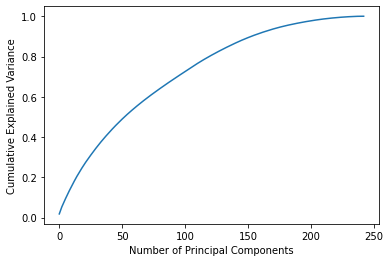

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
# Fit a PCA model to the data
pca = PCA()
pca.fit(X_train_scaled)

# Get the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot the scree plot
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# # Scale input features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_resampled)

# Perform PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Perform LDA
lda = LinearDiscriminantAnalysis()
X_train_lda  = lda.fit_transform(X_train_pca,y_train)
X_test_lda = lda.transform(X_test_pca)
print(X_train_lda.shape)
print(X_test_lda.shape)

(3184, 50)
(796, 50)


In [33]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
# import numpy as np


# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)


# # Define parameter grid
# param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

# # Create linear regression model
# lr = LinearRegression()

# # Create grid search object
# grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit grid search object to data
# grid_search.fit(X_train_scaled,y_train)

# # Print best parameters and corresponding MSE
# print("Best parameters: ", grid_search.best_params_)
# print("MSE: ", -grid_search.best_score_)


In [ ]:

svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train_lda, y_train)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# # Generate the classification report
# report = classification_report(y_true, y_pred)
# print('Classification report:\n', report)


Accuracy: 0.396356783919598
Precision: 0.3575642444518073
Recall: 0.396356783919598
F1-score: 0.36481132558855733


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lr_cv = LogisticRegression(max_iter=10000)
lr_cv.fit(X_train, y_train)
y_pred_lr_cv = lr_cv.predict(X_test)

print("Logistic Regression with CountVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_cv))
print("Precision:", precision_score(y_test, y_pred_lr_cv, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_lr_cv, average="weighted"))
print("F1-score:", f1_score(y_test, y_pred_lr_cv, average="weighted"))

Logistic Regression with CountVectorizer:
Accuracy: 0.314070351758794
Precision: 0.2580385993596347
Recall: 0.314070351758794
F1-score: 0.26937162663846587


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
nb_cv = MultinomialNB()
nb_cv.fit(X_train, y_train)
y_pred_nb_cv = nb_cv.predict(X_test)

print("\nNaive Bayes with CountVectorizer:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_cv))
print("Precision:", precision_score(y_test, y_pred_nb_cv, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_nb_cv, average="weighted"))
print("F1-score:", f1_score(y_test, y_pred_nb_cv, average="weighted"))


Naive Bayes with CountVectorizer:
Accuracy: 0.29208542713567837
Precision: 0.2475818692056129
Recall: 0.29208542713567837
F1-score: 0.25598881616634855


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Precision:", precision_score(y_test, y_pred_dtc, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dtc, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dtc, average='weighted'))

Decision Tree Classifier:
Accuracy: 0.8624371859296482
Precision: 0.8568327749860413
Recall: 0.8624371859296482
F1-score: 0.8582196697774587


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


y_pred_rfc = rfc.predict(X_test)


print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rfc, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_rfc, average='weighted'))


Random Forest Classifier:
Accuracy: 0.8624371859296482
Precision: 0.8568327749860413
Recall: 0.8624371859296482
F1-score: 0.8582196697774587


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
le = LabelEncoder()

# Fit label encoder to disease names and transform them to integer labels
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.5847989949748744
Precision: 0.5330581932026656
Recall: 0.5847989949748744
F1-score: 0.5476224536211973


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# # Random Forest Classifier
# rfc = RandomForestClassifier()

# # Parameter grid for Random Forest Classifier
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'class_weight': [None, 'balanced', 'balanced_subsample']
# }

# # GridSearchCV with Random Forest Classifier
# rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
# rfc_cv.fit(X_train, y_train)

# # Print the best hyperparameters for Random Forest Classifier
# print('Best hyperparameters for Random Forest Classifier: ', rfc_cv.best_params_)
# print('Best score for Random Forest Classifier: ', rfc_cv.best_score_)

# # Voting Classifier with Random Forest, Decision Tree, and XGBoost classifiers
# rfc = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, bootstrap=True, class_weight=None)
# dtc = DecisionTreeClassifier(max_depth=20, min_samples_split=5, min_samples_leaf=1)
# xgb = XGBClassifier(max_depth=20, learning_rate=0.1, n_estimators=100, objective='multi:softprob', booster='gbtree')

# vc = VotingClassifier(estimators=[('rfc', rfc), ('dtc', dtc), ('xgb', xgb)], voting='soft')
# vc.fit(X_train, y_train)

# # Make predictions on the testing set using the Voting Classifier
# y_pred = vc.predict(X_test)

# # Print the accuracy, precision, recall, and F1-score for the Voting Classifier
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Precision:', precision_score(y_test, y_pred, average='macro'))
# print('Recall:', recall_score(y_test, y_pred, average='macro'))
# print('F1-score:', f1_score(y_test, y_pred, average='macro'))


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
def predd(S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,x):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    print(psymptoms)
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    psy = [psymptoms]

    pred2 = x.predict(psy)
    print("The prediction is",pred2[0])

In [ ]:
sympList=df1["Symptom"].to_list()
predd(sympList[7],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,rnd_forest)

['stomach pain', 'chills', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Paralysis (brain hemorrhage)


In [ ]:
sympList=df1["Symptom"].to_list()
predd(sympList[8],sympList[1],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,SVM_hyperd)

['acidity', 'skin rash', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Paralysis (brain hemorrhage)


In [ ]:
sympList=df1["Symptom"].to_list()
predd(sympList[8],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,SVM_unhyperd)

['acidity', 'chills', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Allergy
